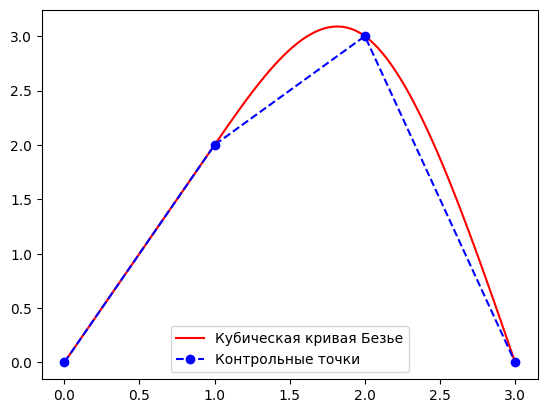

In [4]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Определите контрольные точки
ctrl_points = np.array([[0, 0], [1, 2], [2, 3], [3, 0]])

# Параметры t для контрольных точек
t = np.arange(len(ctrl_points))

# Создайте кубический сплайн для каждой из координат (x, y), используя контрольные точки
cs_x = CubicSpline(t, ctrl_points[:, 0], bc_type='natural')
cs_y = CubicSpline(t, ctrl_points[:, 1], bc_type='natural')

# Генерация точек на кривой
t_new = np.linspace(t[0], t[-1], 100)
x_new = cs_x(t_new)
y_new = cs_y(t_new)

# Отображение кривой
plt.figure()
plt.plot(x_new, y_new, 'r-', label='Кубическая кривая Безье')
plt.plot(ctrl_points[:, 0], ctrl_points[:, 1], 'bo--', label='Контрольные точки')
plt.legend()
plt.show()


In [15]:
import chardet
import pandas as pd

# Путь к файлу
file_path = r'C:\IDE\repository\solid-state_kinetics\resources\Данные ДСК.csv'

# Определение кодировки файла
with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())

# Сохраняем определенную кодировку в переменную
file_encoding = result['encoding']

# Загрузка данных из CSV файла, используем определенную кодировку
df = pd.read_csv(file_path, skiprows=36, sep=';', decimal=',', names=['temperature', 'rate_3', 'rate_5', 'rate_10'], encoding=file_encoding)

# Вывод первых нескольких строк DataFrame для проверки
df['rate_10']


0     -0.028258
1     -0.040936
2     -0.051852
3     -0.062426
4     -0.072626
         ...   
485   -0.523110
486   -0.524070
487   -0.524780
488   -0.524780
489   -0.524780
Name: rate_10, Length: 490, dtype: float64

In [20]:
df['rate_10'] * -1

0      0.028258
1      0.040936
2      0.051852
3      0.062426
4      0.072626
         ...   
485    0.523110
486    0.524070
487    0.524780
488    0.524780
489    0.524780
Name: rate_10, Length: 490, dtype: float64

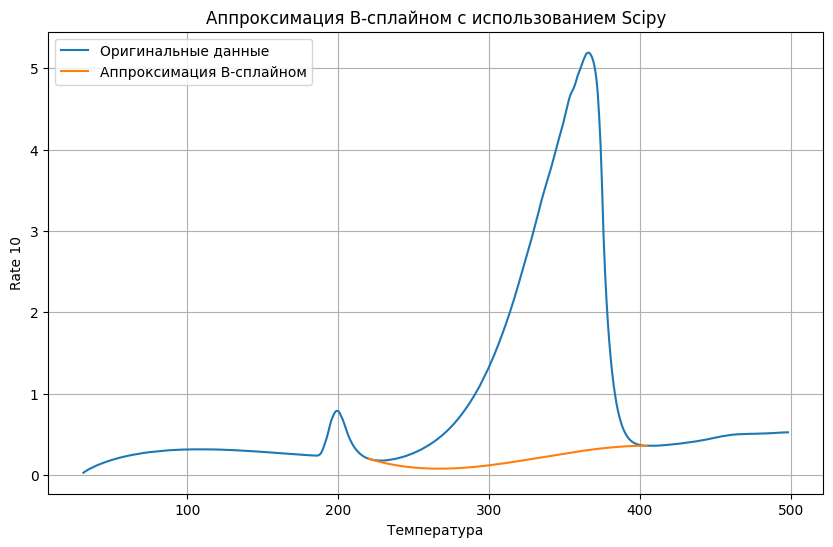

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline




between_220_and_230 = df['temperature'][(df['temperature'] >= 220) & (df['temperature'] <= 223)]
between_220_and_230_2 = df['temperature'][(df['temperature'] >= 403) & (df['temperature'] <= 405)]

# Объединение всех выбранных точек x и соответствующих им точек y
x_points = pd.concat([between_220_and_230, between_220_and_230_2])
y_points = df.loc[x_points.index, 'rate_10']

# Сортировка данных по x, если они еще не отсортированы
sorted_indices = np.argsort(x_points.values)
x_sorted = x_points.values[sorted_indices]
y_sorted = y_points.values[sorted_indices]

# Создание B-сплайна для аппроксимации кривой
spl = make_interp_spline(x_sorted, y_sorted, k=3)  # k - степень сплайна

# Генерация гладких точек кривой
x_smooth = np.linspace(x_sorted.min(), x_sorted.max(), 500)
y_smooth = spl(x_smooth)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(df['temperature'], df['rate_10'], label='Оригинальные данные')
plt.plot(x_smooth, y_smooth, label='Аппроксимация B-сплайном')
plt.title('Аппроксимация B-сплайном с использованием Scipy')
plt.xlabel('Температура')
plt.ylabel('Rate 10')
plt.grid(True)  # Добавляем сетку
plt.legend()
plt.show()
